<a href="https://colab.research.google.com/github/patty543654/hello-world/blob/master/painting_genre_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content


In [8]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time
!ls

100% 2.29G/2.29G [01:37<00:00, 30.5MB/s]
100% 2.29G/2.29G [01:37<00:00, 25.2MB/s]
best-artworks-of-all-time.zip  gdrive  sample_data


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized/resized/Henri_Rousseau_61.jpg  
  inflating: resized/resized/Henri_Rousseau_62.jpg  
  inflating: resized/resized/Henri_Rousseau_63.jpg  
  inflating: resized/resized/Henri_Rousseau_64.jpg  
  inflating: resized/resized/Henri_Rousseau_65.jpg  
  inflating: resized/resized/Henri_Rousseau_66.jpg  
  inflating: resized/resized/Henri_Rousseau_67.jpg  
  inflating: resized/resized/Henri_Rousseau_68.jpg  
  inflating: resized/resized/Henri_Rousseau_69.jpg  
  inflating: resized/resized/Henri_Rousseau_7.jpg  
  inflating: resized/resized/Henri_Rousseau_70.jpg  
  inflating: resized/resized/Henri_Rousseau_8.jpg  
  inflating: resized/resized/Henri_Rousseau_9.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_1.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_10.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_11.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_12.jpg  
  inflat

In [10]:
print(os.listdir())

['.config', 'images', 'resized', 'gdrive', 'artists.csv', 'sample_data']


In [11]:
import pandas as pd
import numpy as np
artists = pd.read_csv('artists.csv')

In [12]:
#checking shape of artists to verify data looks correct
artists.shape

(50, 8)

In [13]:
images_directory = 'images/images'
artists_directories = os.listdir(images_directory)
artists_name = artists['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists_name:
    if os.path.exists(os.path.join(images_directory, name)):
        print("Found -->", os.path.join(images_directory, name))
    else:
        print("Did not find -->", os.path.join(images_directory, name))

Found --> images/images/Amedeo_Modigliani
Found --> images/images/Vasiliy_Kandinskiy
Found --> images/images/Diego_Rivera
Found --> images/images/Claude_Monet
Found --> images/images/Rene_Magritte
Found --> images/images/Salvador_Dali
Found --> images/images/Edouard_Manet
Found --> images/images/Andrei_Rublev
Found --> images/images/Vincent_van_Gogh
Found --> images/images/Gustav_Klimt
Found --> images/images/Hieronymus_Bosch
Found --> images/images/Kazimir_Malevich
Found --> images/images/Mikhail_Vrubel
Found --> images/images/Pablo_Picasso
Found --> images/images/Peter_Paul_Rubens
Found --> images/images/Pierre-Auguste_Renoir
Found --> images/images/Francisco_Goya
Found --> images/images/Frida_Kahlo
Found --> images/images/El_Greco
Did not find --> images/images/Albrecht_Dürer
Found --> images/images/Alfred_Sisley
Found --> images/images/Pieter_Bruegel
Found --> images/images/Marc_Chagall
Found --> images/images/Giotto_di_Bondone
Found --> images/images/Sandro_Botticelli
Found --> im

In [26]:
# It's able to find the images for all artists outside of Albrecht_Dürer after investigating this is because his name in the images directory folder has some odd characters,
# additionally he has two different folders in the directory so I'm combining them into one folder and updating the name to match Albrecht_Dürer. This is done in my google Drive
# so it doesn't have any associated code. I will rerun the directory check in this cell to ensure this corrected it.
# Albrecht_Du╠Иrer and Albrecht_DuтХа├кrer were the incorrect folder names.
# first I must update the directory names
artists_directories = os.listdir(images_directory)
# Now checking if everything is found
for name in artists_name:
    if os.path.exists(os.path.join(images_directory, name)):
        print("Found -->", os.path.join(images_directory, name))
    else:
        print("Not found -->", os.path.join(images_directory, name))


Found --> images/images/Amedeo_Modigliani
Found --> images/images/Vasiliy_Kandinskiy
Found --> images/images/Diego_Rivera
Found --> images/images/Claude_Monet
Found --> images/images/Rene_Magritte
Found --> images/images/Salvador_Dali
Found --> images/images/Edouard_Manet
Found --> images/images/Andrei_Rublev
Found --> images/images/Vincent_van_Gogh
Found --> images/images/Gustav_Klimt
Found --> images/images/Hieronymus_Bosch
Found --> images/images/Kazimir_Malevich
Found --> images/images/Mikhail_Vrubel
Found --> images/images/Pablo_Picasso
Found --> images/images/Peter_Paul_Rubens
Found --> images/images/Pierre-Auguste_Renoir
Found --> images/images/Francisco_Goya
Found --> images/images/Frida_Kahlo
Found --> images/images/El_Greco
Found --> images/images/Albrecht_Dürer
Found --> images/images/Alfred_Sisley
Found --> images/images/Pieter_Bruegel
Found --> images/images/Marc_Chagall
Found --> images/images/Giotto_di_Bondone
Found --> images/images/Sandro_Botticelli
Found --> images/im

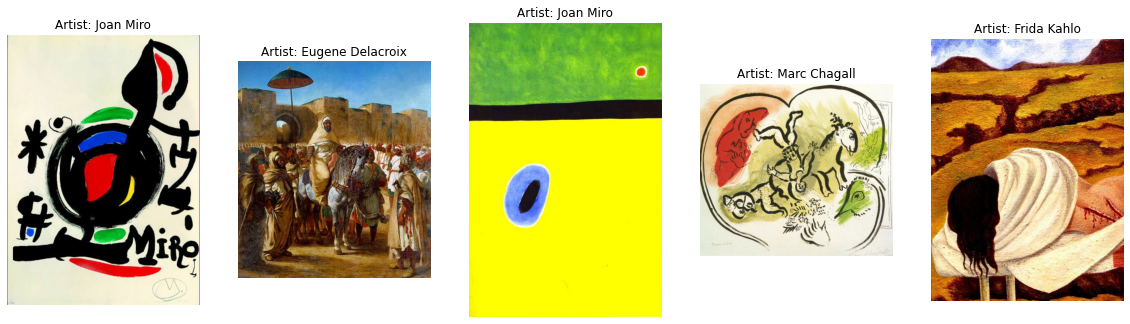

In [14]:
import matplotlib.pyplot as plt
import random
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists_name)
    random_image = random.choice(os.listdir(os.path.join(images_directory, random_artist)))
    random_image_file = os.path.join(images_directory, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()